# Model Evaluation / Comparison

In [1]:
# my virtual environments are rarely properly connected to jupyter so this fixes that. 
# you prolly won't need this cell but running it won't hurt anything either
import sys
import os
current_dir = os.getcwd()  # Get the current working directory
venv_dir = os.path.join(current_dir, 'venv') 
python_version = str(sys.version_info.major) + '.' + str(sys.version_info.minor)
site_packages_path = os.path.join(venv_dir, 'lib', 'python' + python_version, 'site-packages')
sys.path.append(site_packages_path) 

In [2]:
import torch
from model_comparison import  plot_column_from_csv, evaluate_models, format_model_output

In [3]:
models_to_compare = [
    'MM_1m',
    'MM_1m_trained_longer'
]

### first up we'll look at loss curves
notice that even with a log scale I had to splice out the first 5% to make the lines distinct

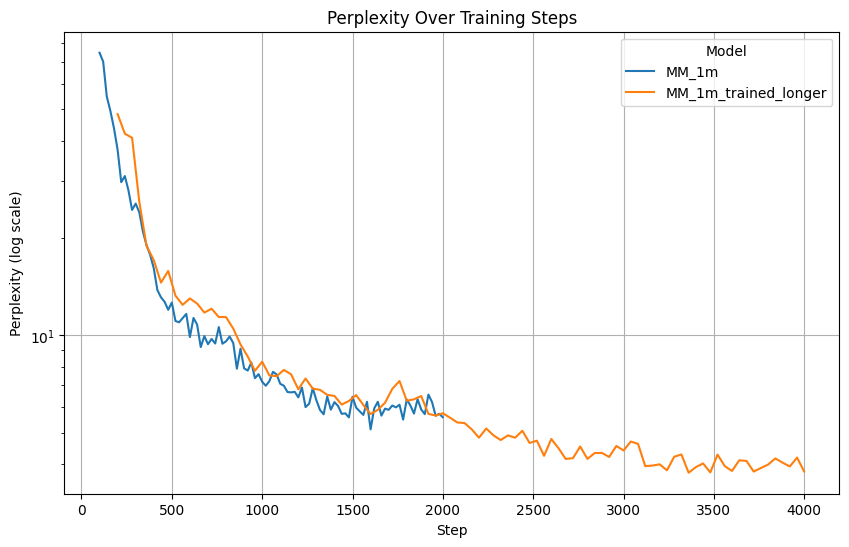

In [4]:
plot_column_from_csv(models_to_compare, 'Step', 'Perplexity', log_y=True, trim_percentage=5)

### now let's compare individual token accuracies
we'll compare topk teacher-forcing accuracies since these models really aren't good enough to be looking at actual inference output

In [9]:
topk = 5
results, correct_data = evaluate_models(models_to_compare, topk)

928.456K parameters
ModelConfig(dim=80, device='cpu', tokenizer='bpe_v1', vocab_len=8192, num_layers=4, second_resid_norm=False, num_heads=2, head_dim=40, max_seq_len=512, mm_bias=False, pmem_size=224, pmem_count=1, scale_first_resid=True, norm_type='RMSNorm', norm_affine=True, norm_bias=True, eps=1e-06)
Model(
  (token_embedder): Embedding(8195, 80)
  (layers): ModuleList(
    (0-3): 4 x Layer(
      (pre_context_norm): Norm()
      (context): ContextMem(
        (k_featurizer): KeyFeatureExtractor(
          (W_k): Linear(in_features=80, out_features=80, bias=False)
          (leaky_avg): LeakyAvg()
        )
        (v_featurizer): ValFeatureExtractor(
          (W_v): Linear(in_features=80, out_features=80, bias=False)
        )
        (c_proj): Linear(in_features=80, out_features=80, bias=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
        (attn_dropout): Dropout(p=0.1, inplace=False)
      )
      (pre_persistent_norm): Norm()
      (persistent): PersistentMem(

In [10]:
# Display the results for each model
for name, data in results.items():
    format_model_output(name, data, topk, data['tokenizer'], correct_data)

Model: MM_1m
  - Top-5 Accuracy: 86.33%
True	Predicted
On	['Once', 'On', 'Lily', 'To', 'Be']
e	['', 'is', 'il', 'er', 'en']
 	['', '', 'was', 'ir', '']
da	['da', 'upon', 'on', 'was', '']
y	['', 'da', 'ie', 'ke', 'me']
, 	[', ', '', '. ', '', '']
a	['', 'th', 'Tim', 'Lily', 'Emma']
 	['', ', ', 'ir', '. ', '']
li	['li', 'big', 'boy', 'sm', 'ti']
t	['', 'li', '', 'ste', 'te']
tle	['tle', '', 'te', "'s", 'asing']
 	['', ', ', '. ', '.\n', "'s"]
boy	['boy', 'gi', 'bird', 'dog', 'fo']
 	['', ', ', '. ', '.\n', '! ']
na	['na', 'da', 'wh', 'ti', 'th']
me	['me', 'nt', 'lly', '', 'na']
d	['', ', ', '', '', 'ly']
 	['', '. ', ', ', "n't", '.\n']
Tim	['na', 'Tim', 'Su', 'Lu', 'Mi']
 	['', '. ', ', ', '.\n', '! ']
we	['we', 'was', 'fo', 'wa', 'and']
nt	['nt', '', '', 'we', 'll']
 	['', '. ', ', ', '.\n', 'nt']
to	['to', 'fo', 'out', 'wi', 'and']
 	['', 'get', '. ', '.\n', ', ']

Model: MM_1m_trained_longer
  - Top-5 Accuracy: 89.65%
True	Predicted
On	['Once', 'On', 'Lily', 'To', 'Sara']
e	['', '',

# in the future it'd be cool to build out an automated GPT-4 rater like what they used in the TinyStories paper

# also once the hyperparameter search module is working i should build a system that performs a regression on the hyperparameters tested to predict teacher-forcing topk accuracy. likely need to include both linear, quadratic, & interaction terms in the regression and then do a lasso to remove useless terms